In [1]:
import pandas as pd
from pandas import read_csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
path = r"D:\Semester 4\Machine Learning Lab\boston.csv"
BostonTrain = pd.read_csv(path)
print(BostonTrain.head())
# BostonTrain.info()
# BostonTrain.describe()
X = BostonTrain.drop('MEDV',axis=1)
y = BostonTrain['MEDV']


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-nu

In [3]:

from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
# Fit the linear regression model on the training data
model = LinearRegression().fit(X_train, y_train)

# Predict the target variable using the model for both the training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the mean squared error for both the training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

In [14]:
print("Train MSE = ",train_mse)
print("Test MSE = ",test_mse)

Train MSE =  22.419716470044353
Test MSE =  22.43193607073748


<Axes: >

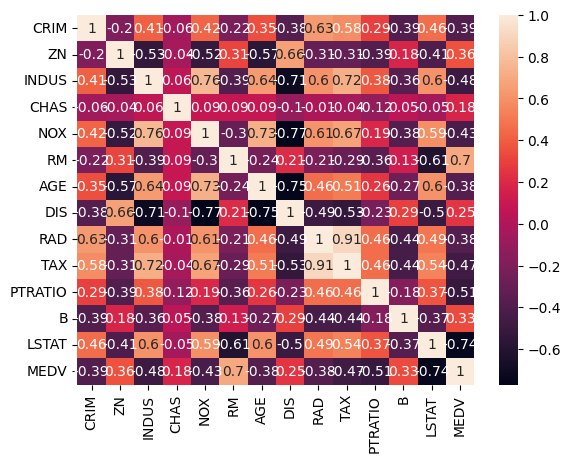

In [5]:
correlation_matrix = BostonTrain.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

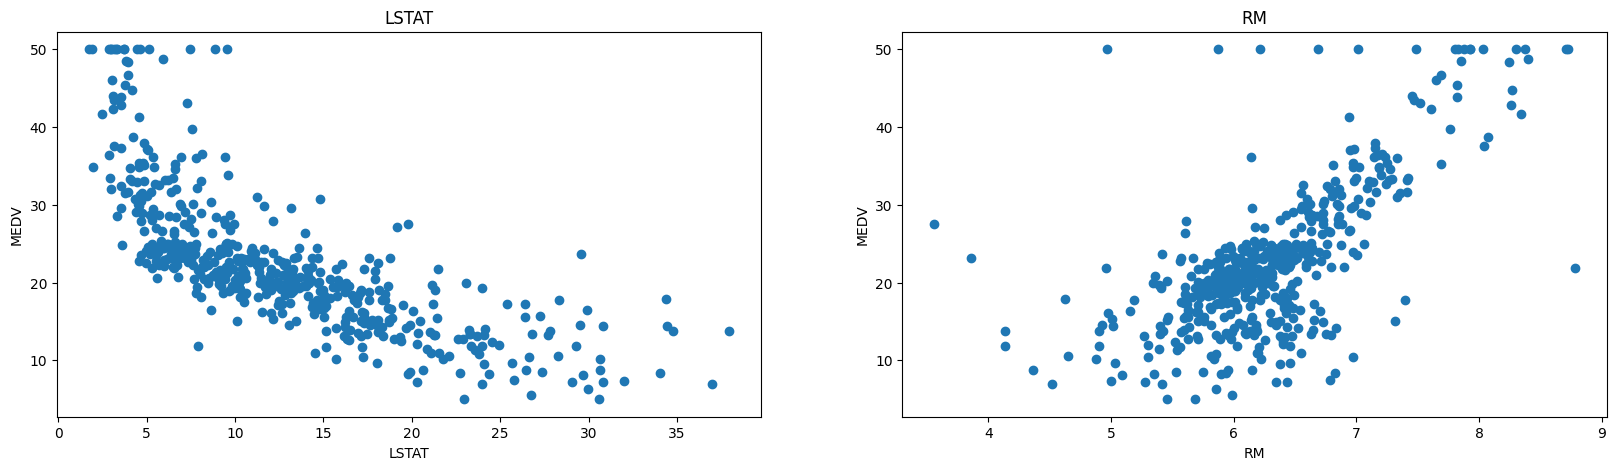

In [7]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = BostonTrain['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = BostonTrain[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [9]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_train_pred = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2 = r2_score(y_train, y_train_pred)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_pred = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2 = r2_score(y_test, y_test_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.734946300650552
R2 score is 0.7419034960343789


The model performance for testing set
--------------------------------------
RMSE is 4.736236488050135
R2 score is 0.7147895265576856


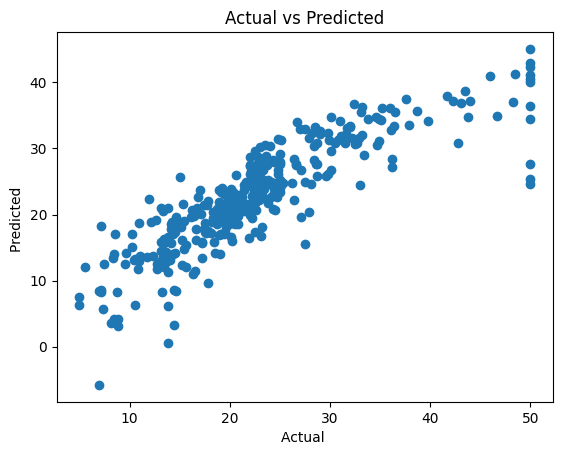

In [13]:
plt.scatter(y_train,y_train_pred)
plt.xlabel('Actual ')
plt.ylabel('Predicted ')
plt.title('Actual vs Predicted')
plt.show()